c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


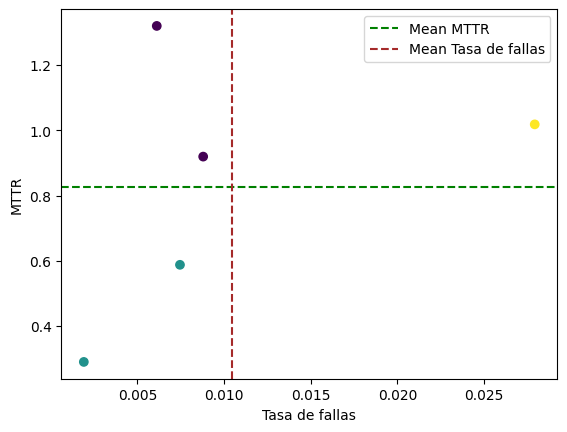

    item       TTR  Total_fallas      MTTR      tasa  indisponibilidad   
0  CO-01    2.9000            10  0.290000  0.001912          0.000554  \
1  CO-02   42.2300            32  1.319687  0.006119          0.008075   
2  CO-03   42.2833            46  0.919202  0.008795          0.008085   
3  CO-04  148.6263           146  1.017988  0.027916          0.028418   
4  CO-05   22.9167            39  0.587608  0.007457          0.004382   

   clusters  
0         1  
1         0  
2         0  
3         2  
4         1  


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Datos
item = ['CO-01','CO-02','CO-03','CO-04','CO-05'] #Equipos considerados
TTR = [2.9000, 42.2300, 42.2833, 148.6263, 22.9167] #Tiempo dedicado a la reparacion
Total_fallas = [10, 32, 46, 146, 39] #Total de veces que falla 

# Creación del DataFrame
data = {
    'item': item,
    'TTR': TTR,
    'Total_fallas': Total_fallas
}
ds = pd.DataFrame(data)

# Tiempo de operacion acumulada todo el año
UpTime = 5230

# Cálculo de MTTR = TTR / Total_fallas
ds['MTTR'] = ds['TTR'] / ds['Total_fallas']

# Cálculo de tasa de fallas
ds['tasa'] = 1 / (UpTime / ds['Total_fallas'])

# Cálculo de la indisponibilidad
ds['indisponibilidad'] = ds['MTTR'] * ds['tasa']

# Escalamiento y selección de columnas 4:6
ds_scale = StandardScaler().fit_transform(ds.iloc[:, 3:6])

# Realizamos el clustering
kmeans = KMeans(n_clusters=3, random_state=80)
ds['clusters'] = kmeans.fit_predict(ds_scale)

# Calculando promedios
mean_MTTR = ds['MTTR'].mean()
mean_tasa = ds['tasa'].mean()
mean_indisponibilidad = ds['indisponibilidad'].mean()

# Gráficas
plt.scatter(ds['tasa'], ds['MTTR'], c=ds['clusters'])
plt.axhline(mean_MTTR, color='green', linestyle='--', label='Mean MTTR')
plt.axvline(mean_tasa, color='brown', linestyle='--', label='Mean Tasa de fallas')
plt.legend()
plt.xlabel('Tasa de fallas')
plt.ylabel('MTTR')
plt.show()

print(ds)
